In [2]:
import pipeline
import filepaths as fp
import torch

from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all

from pos_model import EncoderPOS, AttnDecoderPOS
from pos_model_train import trainIters as trainItersPOS
from pos_model_predict import predict_all as predict_allPOS

In [ ]:
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, 
                max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_epochs, max_length, 
        print_every, plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours,
        clip = clip)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every


In [ ]:
#### TOY DATA: to test if every thing is working

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 50
max_hours = 9
clip = 10
plot_every = 15
MAX_LENGTH = 24
print_every = 60

(encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 80, vocab_threshold = 1,
    padding = False, model_name = 'rnn_toy')


In [ ]:
#### RNN: TRAIN and Validation DATA using BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 20
max_hours = 10
clip = 8
use_bpe = True
replace_unknown_words = True
padding = False
MAX_LENGTH = 25
plot_every = 200 
print_every = 28319 # every epoch

(encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = True, num_operations = 400, vocab_threshold = 5, 
    padding = False, model_name = 'rnn_bpe')


In [3]:
def train_model_pos(index_array_pairs, s_vocab_size, t_vocab_size, max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderPOS(s_vocab_size, max_length, hidden_size).to(device)
    attn_decoder = AttnDecoderPOS(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_losses = trainItersPOS(
        index_array_pairs, encoder, attn_decoder, n_epochs, max_length, 
        print_every, plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours, clip=clip)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every




Data files preprocessed ...

28 inputs constructed for training ...

Training finished ...



<Figure size 432x288 with 0 Axes>

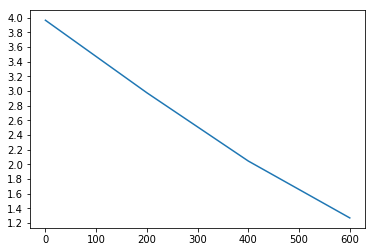

Losses diagram saved in TODO
Models and data saved to disk

28 inputs constructed for testing ...

28 outputs predicted ...

Predictions written to ../output/toy.preprocessed-test.pos_toy.predicted.en
Blue score written to ../output/toy.preprocessed-test.pos_toy.BLEU
des clients sont debout devant une supérette . EOS
des clients sont debout devant une supérette . EOS
pines , and two dogs running along the beach EOS
pines , and two dogs running along the beach EOS


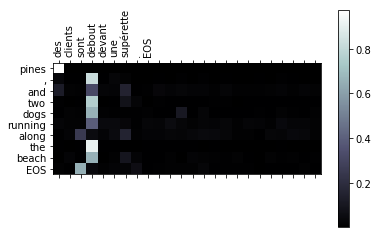

deux personnes sur un terrain de football américain , l&apos; une au sol . EOS
deux personnes sur un terrain de football américain , l&apos; une au sol . EOS
two dogs running along along the beach EOS
two dogs running along along the beach EOS


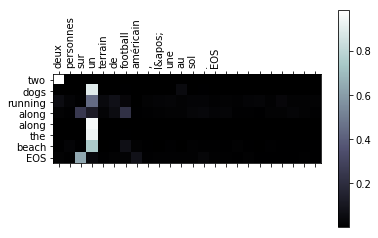

deux personnes allongées sur le trottoir devant un mur de graffitis . EOS
deux personnes allongées sur le trottoir devant un mur de graffitis . EOS
two dogs running along along the beach EOS
two dogs running along along the beach EOS


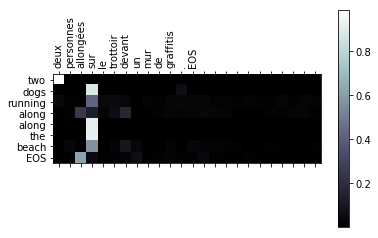

une remorque en bois à quatre roues garée sur une plateforme en bois . EOS
une remorque en bois à quatre roues garée sur une plateforme en bois . EOS
a young man and two dogs running along the beach EOS
a young man and two dogs running along the beach EOS


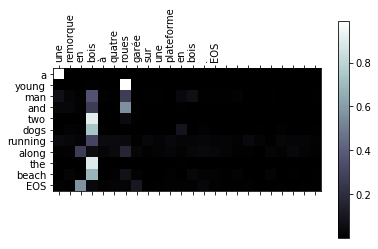

une petite fille jouant avec ses jouets dans le sable EOS
une petite fille jouant avec ses jouets dans le sable EOS
a young man and two dogs running along along the beach EOS
a young man and two dogs running along along the beach EOS


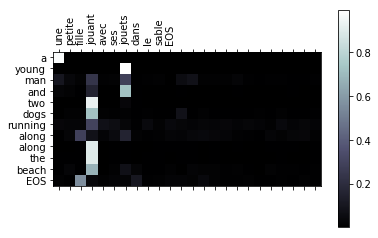

Attention diagrams saved to disk


In [5]:
#### TOY DATA
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
# n_iters = 10
n_epochs = 30
max_hours = 9
clip = 10
plot_every = 200 
print_every = 28319 # every epoch

MAX_LENGTH = 24
encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model_pos, predict_allPOS, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = False, num_operations = 80, vocab_threshold = 1,
    padding = False, model_name = 'pos_toy')

In [ ]:
#### TRAIN and TEST DATA WITHOUT BPE
# verplaats directory van je modelsss na runnen 
hidden_size = 256
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 20
max_hours = 10
clip = 8
use_bpe = False
replace_unknown_words = True
padding = True
MAX_LENGTH = 25
plot_every = 200
print_every = 28319 # every epoch

encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model_pos, predict_allPOS, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = False, num_operations = 100, vocab_threshold = 1, 
    padding = False, model_name = 'pos_no_bpe')

In [ ]:
#### TRAIN and TEST DATA WITHOUT BPE
# verplaats directory van je modelsss na runnen 
hidden_size = 256
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 20
max_hours = 10
clip = 8
use_bpe = False
replace_unknown_words = True
padding = True
MAX_LENGTH = 25
plot_every = 200
print_every = 28319 # every epoch

encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model_pos, predict_allPOS, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = True, num_operations = 400, vocab_threshold = 5, 
    padding = False, model_name = 'pos_bpe')